<a href="https://colab.research.google.com/github/Joel-Wang-Math/MMiDS_extensions/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

def opt_reps(X, k, assign):
    (n, d) = X.shape
    reps = np.zeros((k, d))
    for i in range(k):
        in_i = [j for j in range(n) if assign[j] == i]
        reps[i,:] = np.sum(X[in_i,:],axis=0) / len(in_i)
    return reps

def opt_clust(X, k, reps):
    (n, d) = X.shape
    dist = np.zeros(n)
    assign = np.zeros(n, dtype=int)
    for j in range(n):
        dist_to_i = np.array([LA.norm(X[j,:] - reps[i,:]) for i in range(k)])
        assign[j] = np.argmin(dist_to_i)
        dist[j] = dist_to_i[assign[j]]
    G = np.sum(dist ** 2)
    print(G)
    return assign

In [40]:
def kmeans(rng, X, k, maxiter=5):
    (n, d) = X.shape
    assign = rng.integers(0,k,n) # generates an array of n random integers, each between 0 and k - 1 (inclusive of 0, exclusive of k).
    reps = np.zeros((k, d), dtype=int)
    for iter in range(maxiter):
        reps = opt_reps(X, k, assign)
        assign = opt_clust(X, k, reps)
    return assign


def kmeans_tol(rng, X, k, tol=0.1, max_iter=100):
    n, d = X.shape
    assign = rng.integers(0,k,n)
    reps = np.zeros((k, d), dtype=int)
    prev_G = np.inf

    for iter in range(max_iter):
        # Step 1: update representatives (cluster centers)
        reps = np.array([X[assign == j].mean(axis=0) if np.any(assign == j) else X[rng.integers(0, n)] for j in range(k)])

        # Step 2: update assignments
        distances = np.linalg.norm(X[:, None] - reps, axis=2)
        assign = distances.argmin(axis=1)

        # Step 3: Compute objective G (sum of squared distances)
        G = np.sum((X - reps[assign]) ** 2)

        # Check for convergence
        improvement = prev_G - G
        if improvement >= 0 and improvement < tol:
            print(f"Converged after {iter + 1} iterations with improvement {improvement:.4f}")
            break

        prev_G = G

    return assign, reps

In [44]:
seed = 535
rng = np.random.default_rng(seed)
X = np.array([[1., 0.],[-2., 0.],[-2.,1.],[1.,-3.],
              [-10.,10.],[2.,-2.],[-3.,1.],[3.,-1.]])
assign = kmeans(rng, X, 3) # Why we couldn't set k = 7? Does this implementation handle empty clusters?

162.7
74.8611111111111
9.083333333333334
9.083333333333334
9.083333333333334


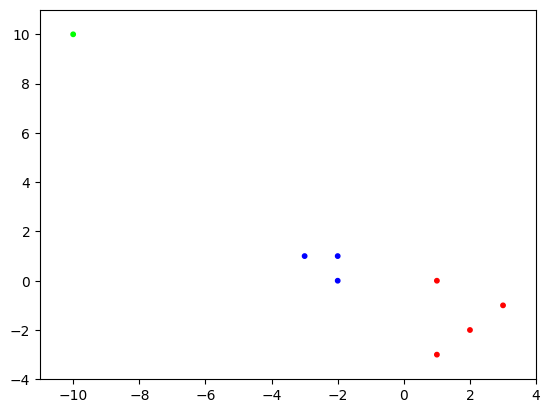

In [45]:
plt.scatter(X[:,0], X[:,1], s=10, c=assign, cmap='brg')
plt.axis([-11,4,-4,11])
plt.show()

In [46]:
print(opt_reps(X, 3, assign))

[[ -2.33333333   0.66666667]
 [  1.75        -1.5       ]
 [-10.          10.        ]]
